<a href="https://colab.research.google.com/github/Jihyesh/codestates_projects_section2/blob/main/Vestiaire_Collective_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem frame

1. 해결하고자 하는 문제가 적용되는 시나리오를 제시합니다.
  - Consumer to consumer(C2C) 플랫폼에 가입한 사용자가 `구매`활동을 할지, 사용자의 `판매`가 얼마나 증가할 지 확인
  - 기대 효과 시나리오 : 잠재적 고객을 알아보고, 홍보와 마케팅을 집중
2. 문제 해결의 필요성에 대해 명확히 제시합니다.
  - 플랫폼의 활용도를 확인하고, 명품 재판매(중고 명품 구매)를 활발하게 하기 위한 방안을 확인
3. 데이터셋 선정이 끝났다면 어떤 유형의 문제로 (분류 / 회귀) 접근할지도 결정합니다.
  - 데이터셋은 Vestiaire Collective 이용자의 거래, 커뮤니티 활동, 인구통계학적 정보
  - 구매 활동에 대해서는 분류 문제로 접근하여, 가입한 이후 구매로 이어지는지 확인
  - 판매 활동에 대해서는 회귀 문제로 접근하여, 판매량과 판매율을 증가시키는 요인이 무엇인지 확인
4. 데이터셋에서 해결하고자 하는 문제 정의에 적절한 타겟을 선정합니다.
  - 구매 활동의 타겟: `productsBought`
  - 판매 활동의 타겟: `productsSold`
5. 타겟을 잘 설명할 수 있을 만한 특성에 대한 가설을 설정합니다.
  - 미혼인 여성이 구매로 이어질 확률이 높다
  - 명품 재고를 많이 가지고 있는 판매자의 판매량이 높을 것이고, 재고를 많이 보여주기 때문에 커뮤니티 팔로워수가 많은 사용자의 판매량과 판매율 모두 높다





### 🏃 Import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# #to see what files are in codestates file
# !ls "/content/drive/MyDrive/codestates/section2 project"

import pandas as pd
url ='/content/drive/MyDrive/codestates/section2 project/6M-0K-99K.users.dataset.public.csv'
# df = pd.read_excel(url, sheet_name=0)
df = pd.read_csv(url)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [ ]:
# df_clean = df.copy()

In [ ]:
# df_clean.socialNbFollowers.mean()

3.432268761436818

In [ ]:
# df_clean.socialNbFollows.mean()

8.42567711018774

In [ ]:
# df_clean.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [ ]:
# df_clean.query('productsBought !=0').socialNbFollowers.mean()

5.539213877099096

In [ ]:
# df_clean.query('productsBought !=0').socialNbFollows.mean()

9.309835763055915

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


### EDA

#### productsSold = productsBought = 0

In [ ]:
df.query('productsSold == 0')

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
2036,4020093783926093303,user,Danemark,en,57,9,16040,0,0,0.0,...,mr,True,False,True,False,11,2859,95.30,7.94,dk
2037,-570090104375204752,user,France,fr,46,62,402,0,0,0.0,...,mrs,True,False,True,False,103,3204,106.80,8.90,fr
2038,-3962966747526190677,user,Suède,en,45,33,72,0,0,0.0,...,mrs,True,False,True,False,118,3203,106.77,8.90,se
2039,-868988292168165338,user,Etats-Unis,en,43,117,2823,0,0,0.0,...,mrs,True,False,True,True,266,3198,106.60,8.88,us
2040,7035077578858069367,user,Canada,en,39,20,250,0,0,0.0,...,mrs,True,False,True,False,11,3205,106.83,8.90,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-5324380437900495747,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.90,us
98909,-5607668753771114442,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,350630276238833248,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.90,be
98911,2006580738726207028,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.90,it


In [ ]:
df.query('productsBought == 0')


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us
5,7631788075812383072,user,Allemagne,de,130,12,1,47,123,91.0,...,mrs,True,False,True,False,11,3196,106.53,8.88,de
7,2550976450216757005,user,France,fr,53,9,3,5,106,98.0,...,mrs,True,False,True,True,11,2857,95.23,7.94,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-5324380437900495747,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.90,us
98909,-5607668753771114442,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,350630276238833248,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.90,be
98911,2006580738726207028,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.90,it


In [ ]:
df.query('(productsSold == 0) & (productsBought ==0)')

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
2045,-8968800563285319181,user,Hong Kong,en,36,53,67,0,0,0.0,...,mrs,True,False,True,False,43,3195,106.50,8.88,hk
2047,4853552482532850469,user,Etats-Unis,en,35,9,2,0,0,0.0,...,mrs,True,False,True,False,325,3205,106.83,8.90,us
2053,9024932754956745505,user,Etats-Unis,en,31,8,7,0,0,0.0,...,mrs,True,False,True,False,677,3205,106.83,8.90,us
2054,-1097516845420712140,user,Canada,fr,31,9,594,0,0,0.0,...,mrs,False,False,False,False,633,3204,106.80,8.90,ca
2055,9125572335205643215,user,Hong Kong,en,31,8,6,0,0,0.0,...,mrs,True,False,True,False,647,3204,106.80,8.90,hk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-5324380437900495747,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.90,us
98909,-5607668753771114442,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,350630276238833248,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.90,be
98911,2006580738726207028,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.90,it


#### Missing values, Dupicated values
 - None

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [ ]:
df[df.duplicated()]

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode


**identifierHash**

In [ ]:
df.duplicated(subset='identifierHash').sum()

0

#### Data description
'identifierHash' : user identity </br>
'type': user </br>
'country': user's country</br>
'language': user's language</br>
'socialNbFollowers': the number of users that follows the user</br>
'socialNbFollows': the number of users that the user follows </br>
'socialProductsLiked': the number of products the user (just) liked</br>
'productsListed': the number of products the user listed</br>
'productsSold': the number of products the user sold</br>
'productsPassRate': the percentage of products meeting the product description (The store's team reviews sold products before being shipped to the buyer.) </br>
'productsWished': the number of items the user wished</br> 
'productsBought': the number of items the user purchased</br>
'gender': user's gender type</br>
'civilityGenderId': 1, 2, 3  </br>
'civilityTitle' : Mr, Mrs, Miss  
'hasAnyApp'</br>
'hasAndroidApp'</br>
'hasIosApp'</br>
'hasProfilePicture': user has profile picture</br>
'daysSinceLastLogin'</br>
'seniority': days after sign up</br>
'seniorityAsMonths':</br>
'seniorityAsYears':</br>
'countryCode'</br>

##### productsSold
 - Right skewed

In [ ]:
df.sort_values(by='productsSold', ascending=False)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,104,1,M,1,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,0,0,F,2,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,10,3,F,2,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,7,0,F,2,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,0,0,F,2,mrs,False,False,False,True,22,2854,95.13,7.93,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34325,-1421910227984300933,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,704,3200,106.67,8.89,us
34324,3456820073788968616,user,France,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,367,3200,106.67,8.89,fr
34323,-1254806636236287317,user,France,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,704,3200,106.67,8.89,fr
34322,5028604204265727927,user,Allemagne,de,3,8,0,0,0,0.0,1,0,F,2,mrs,False,False,False,True,335,3200,106.67,8.89,de


(array([9.877e+04, 8.600e+01, 2.100e+01, 1.400e+01, 8.000e+00, 6.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([  0. ,  17.4,  34.8,  52.2,  69.6,  87. , 104.4, 121.8, 139.2,
        156.6, 174. ]),
 <a list of 10 Patch objects>)

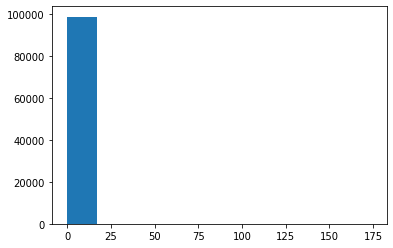

In [ ]:
plt.hist(df.productsSold)

(array([1.902e+03, 7.800e+01, 2.000e+01, 1.600e+01, 1.000e+01, 2.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([  1. ,  18.3,  35.6,  52.9,  70.2,  87.5, 104.8, 122.1, 139.4,
        156.7, 174. ]),
 <a list of 10 Patch objects>)

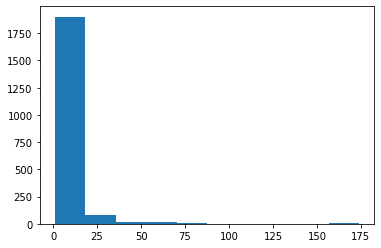

In [ ]:
plt.hist(df.productsSold[df.productsSold >0])

(array([917., 325., 154., 124.,  58.,  58.,  45.,  31.,  42.,  27.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

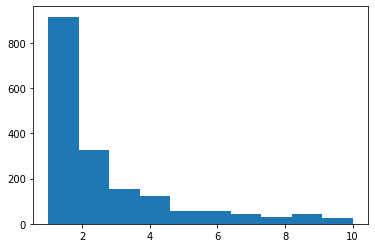

In [ ]:
plt.hist(df.productsSold[(df.productsSold <=10)&(df.productsSold >0)])

(array([112.,  41.,  28.,  18.,   6.,   9.,   6.,   4.,   7.,   5.]),
 array([11. , 17.2, 23.4, 29.6, 35.8, 42. , 48.2, 54.4, 60.6, 66.8, 73. ]),
 <a list of 10 Patch objects>)

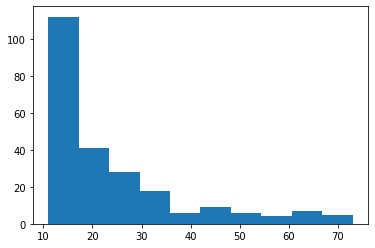

In [ ]:
plt.hist(df.productsSold[(df.productsSold <=75)&(df.productsSold >10)])

(array([9., 1., 2., 1., 2., 0., 0., 1., 1., 2.]),
 array([ 78. ,  87.6,  97.2, 106.8, 116.4, 126. , 135.6, 145.2, 154.8,
        164.4, 174. ]),
 <a list of 10 Patch objects>)

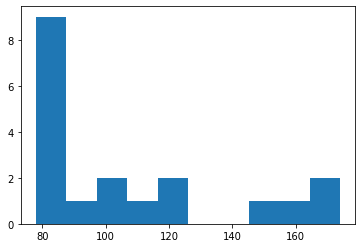

In [ ]:
plt.hist(df.productsSold[df.productsSold >75])

##### productsBought

In [ ]:
df.sort_values(by='productsBought', ascending=False)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
1144,1513245000248951841,user,Belgique,fr,23,8,2,1,1,0.0,1916,405,F,2,mrs,False,False,False,True,29,2855,95.17,7.93,be
210,-8963521929858247469,user,France,fr,16,9,0,4,12,91.0,12,279,M,1,mr,False,False,False,True,11,3199,106.63,8.89,fr
324,5666274082428572635,user,Etats-Unis,en,43,23,894,3,8,62.5,290,174,F,2,mrs,True,False,True,True,11,3202,106.73,8.89,us
22,6048206785556031922,user,France,fr,73,27,104,8,69,98.0,182,115,F,2,mrs,True,False,True,False,11,2853,95.10,7.92,fr
6,674361423306028463,user,Suède,en,121,0,1140,31,108,94.0,531,105,F,3,miss,True,True,False,False,11,3198,106.60,8.88,se
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35238,703602936322704395,user,France,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,True,False,True,True,703,3199,106.63,8.89,fr
35237,-4595451250486786469,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,M,1,mr,False,False,False,True,703,3199,106.63,8.89,us
35236,-1123250888011186657,user,Royaume-Uni,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,703,3199,106.63,8.89,gb
35235,8573752867665153690,user,Etats-Unis,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,703,3199,106.63,8.89,us


(array([9.8879e+04, 2.5000e+01, 6.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  40.5,  81. , 121.5, 162. , 202.5, 243. , 283.5, 324. ,
        364.5, 405. ]),
 <a list of 10 Patch objects>)

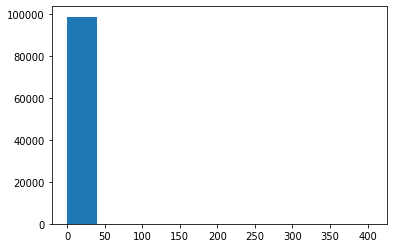

In [ ]:
plt.hist(df.productsBought)

(array([9.8214e+04, 4.0400e+02, 1.1700e+02, 6.1000e+01, 2.9000e+01,
        2.4000e+01, 1.7000e+01, 1.1000e+01, 4.0000e+00, 5.0000e+00]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <a list of 10 Patch objects>)

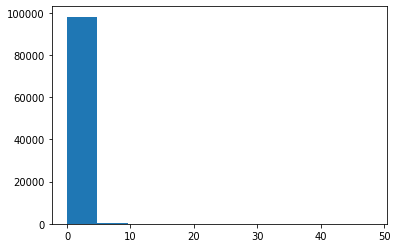

In [ ]:
plt.hist(df.productsBought[(df.productsBought <50)])

(array([4.859e+03, 3.020e+02, 9.100e+01, 5.000e+01, 3.600e+01, 1.700e+01,
        1.700e+01, 1.100e+01, 4.000e+00, 5.000e+00]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <a list of 10 Patch objects>)

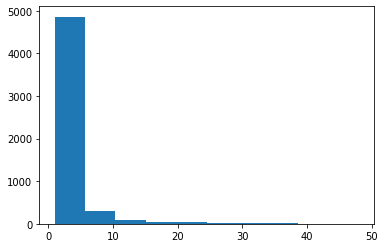

In [ ]:
plt.hist(df.productsBought[(df.productsBought <50)&(df.productsBought >0)])

(array([80., 52., 32., 20., 10., 17.,  9.,  4.,  4.,  3.]),
 array([11. , 14.7, 18.4, 22.1, 25.8, 29.5, 33.2, 36.9, 40.6, 44.3, 48. ]),
 <a list of 10 Patch objects>)

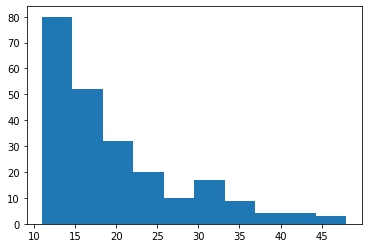

In [ ]:
plt.hist(df.productsBought[(df.productsBought <50)&(df.productsBought >10)])

(array([19.,  4.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 51. ,  86.4, 121.8, 157.2, 192.6, 228. , 263.4, 298.8, 334.2,
        369.6, 405. ]),
 <a list of 10 Patch objects>)

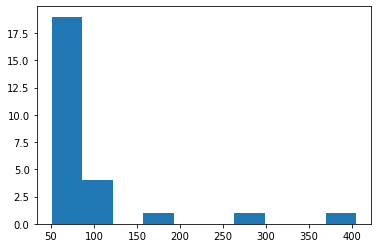

In [ ]:
plt.hist(df.productsBought[(df.productsBought >50)])

(array([2., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([105., 135., 165., 195., 225., 255., 285., 315., 345., 375., 405.]),
 <a list of 10 Patch objects>)

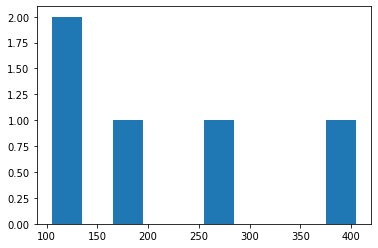

In [ ]:
plt.hist(df.productsBought[(df.productsBought >100)])

In [ ]:
df_clean = df.copy()

In [ ]:
df.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [ ]:
df_clean[(df_clean.productsBought >0)].sort_values(by='productsBought', ascending=False)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
1144,1513245000248951841,user,Belgique,fr,23,8,2,1,1,0.0,1916,405,F,2,mrs,False,False,False,True,29,2855,95.17,7.93,be
210,-8963521929858247469,user,France,fr,16,9,0,4,12,91.0,12,279,M,1,mr,False,False,False,True,11,3199,106.63,8.89,fr
324,5666274082428572635,user,Etats-Unis,en,43,23,894,3,8,62.5,290,174,F,2,mrs,True,False,True,True,11,3202,106.73,8.89,us
22,6048206785556031922,user,France,fr,73,27,104,8,69,98.0,182,115,F,2,mrs,True,False,True,False,11,2853,95.10,7.92,fr
6,674361423306028463,user,Suède,en,121,0,1140,31,108,94.0,531,105,F,3,miss,True,True,False,False,11,3198,106.60,8.88,se
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15484,-2000768263949694506,user,Etats-Unis,en,3,8,1,0,0,0.0,0,1,F,2,mrs,False,False,False,True,707,3204,106.80,8.90,us
15509,4003842878339620525,user,Etats-Unis,en,3,8,0,0,0,0.0,0,1,F,2,mrs,False,False,False,True,708,3204,106.80,8.90,us
3266,1131697022363165296,user,Australie,en,7,8,1,0,0,0.0,1,1,F,2,mrs,False,False,False,True,21,3204,106.80,8.90,au
3265,-4952334781140747596,user,Etats-Unis,en,7,17,46,0,0,0.0,47,1,F,2,mrs,True,False,True,False,471,3204,106.80,8.90,us


(array([9.8879e+04, 2.5000e+01, 6.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  40.5,  81. , 121.5, 162. , 202.5, 243. , 283.5, 324. ,
        364.5, 405. ]),
 <a list of 10 Patch objects>)

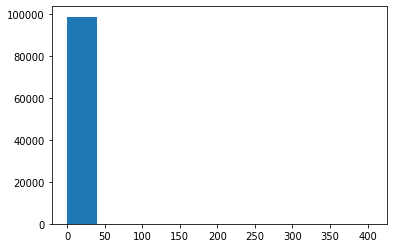

In [ ]:
plt.hist(df_clean.productsBought)

(array([9.3494e+04, 3.2970e+03, 8.4500e+02, 3.6400e+02, 2.1400e+02,
        1.3900e+02, 1.0800e+02, 6.5000e+01, 5.2000e+01, 4.0000e+01]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

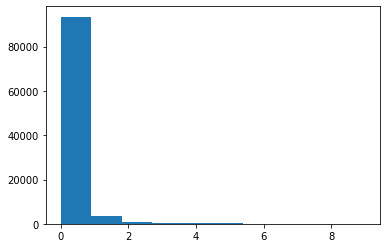

In [ ]:
# plt.hist(df_clean[(df_clean.productsBought < 50)].productsBought)
plt.hist(df_clean[(df_clean.productsBought < 10)].productsBought)

(array([3297.,  845.,  364.,  214.,    0.,  139.,  108.,   65.,   52.,
          40.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

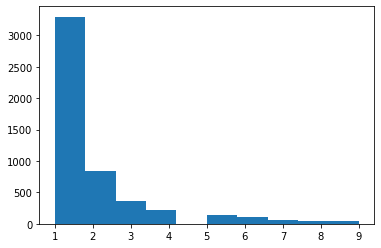

In [ ]:
plt.hist(df_clean[(df_clean.productsBought >0) & (df_clean.productsBought < 10)].productsBought)

(array([19.,  4.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 51. ,  86.4, 121.8, 157.2, 192.6, 228. , 263.4, 298.8, 334.2,
        369.6, 405. ]),
 <a list of 10 Patch objects>)

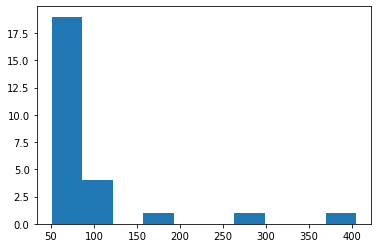

In [ ]:
plt.hist(df_clean[(df_clean.productsBought > 50)].productsBought)


(array([2., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([105., 135., 165., 195., 225., 255., 285., 315., 345., 375., 405.]),
 <a list of 10 Patch objects>)

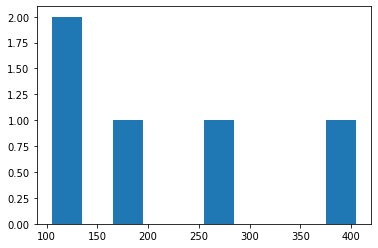

In [ ]:
plt.hist(df_clean[(df_clean.productsBought > 100)].productsBought)

In [ ]:
df_clean[df_clean.productsBought >100].productsBought.value_counts

<bound method IndexOpsMixin.value_counts of 6       105
22      115
210     279
324     174
1144    405
Name: productsBought, dtype: int64>

In [ ]:
df_clean.iloc[[22]]

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
22,6048206785556031922,user,France,fr,73,27,104,8,69,98.0,182,115,F,2,mrs,True,False,True,False,11,2853,95.1,7.92,fr


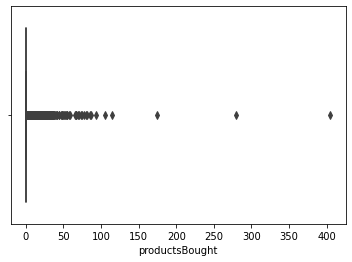

In [ ]:
import seaborn as sns

# df = sns.load_dataset("titanic")
sns.boxplot(x=df_clean["productsBought"])

In [ ]:
df_clean.query('productsBought > 100').productsBought.sum()/df_clean.productsBought.sum()

0.06338939197930142

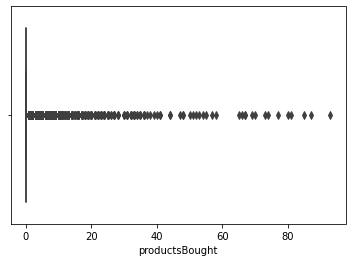

In [ ]:
sns.boxplot(x=df_clean.query('productsBought <= 100').productsBought)

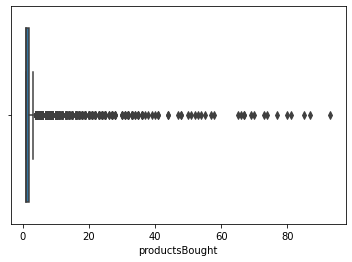

In [ ]:
sns.boxplot(x=df_clean.query('(productsBought <= 100) &(productsBought >0)').productsBought)

In [ ]:
df_clean.productsBought.describe()

count    98913.000000
mean         0.171929
std          2.332266
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        405.000000
Name: productsBought, dtype: float64

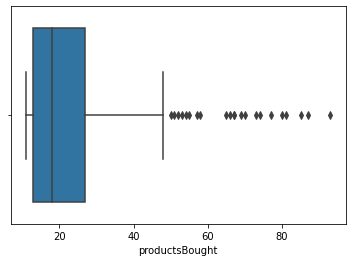

In [ ]:
sns.boxplot(x=df_clean.query('(productsBought <= 100) &(productsBought >10)').productsBought)


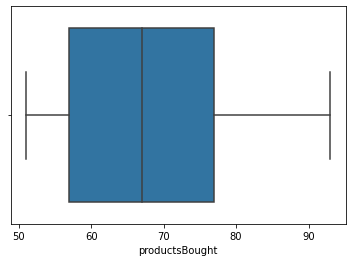

In [ ]:
sns.boxplot(x=df_clean.query('(productsBought <= 100) &(productsBought >50)').productsBought)

(array([5., 2., 0., 4., 2., 2., 2., 1., 2., 1.]),
 array([51. , 55.2, 59.4, 63.6, 67.8, 72. , 76.2, 80.4, 84.6, 88.8, 93. ]),
 <a list of 10 Patch objects>)

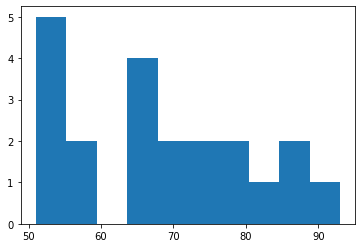

In [ ]:
plt.hist(df_clean.query('(productsBought <= 100) &(productsBought >50)').productsBought)

(array([3297.,    0.,  845.,    0.,    0.,  364.,    0.,  214.,    0.,
         139.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

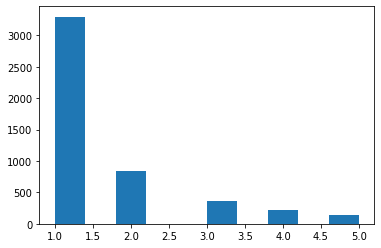

In [ ]:
plt.hist(df_clean.query('(productsBought <= 5) &(productsBought >0)').productsBought)

In [ ]:
df_clean.query('(productsBought==1) & (productsSold ==0)')

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
2042,1498789053995996013,user,Royaume-Uni,en,37,36,428,0,0,0.0,31,1,F,2,mrs,True,False,True,True,83,3203,106.77,8.9,gb
2050,-651914373435670915,user,Espagne,es,32,10,2,0,0,0.0,1,1,M,1,mr,True,False,True,False,420,3205,106.83,8.9,es
2051,5490449000870856288,user,Italie,it,32,10,207,0,0,0.0,1,1,F,2,mrs,True,False,True,False,47,3204,106.80,8.9,it
2064,1941836471542792442,user,Royaume-Uni,en,30,8,0,0,0,0.0,26,1,F,2,mrs,True,True,False,False,580,3204,106.80,8.9,gb
2085,3275955920151491522,user,Italie,it,28,38,3,0,0,0.0,0,1,F,2,mrs,True,False,True,True,79,3204,106.80,8.9,it
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98519,5897667923341350413,user,Suède,en,3,8,0,0,0,0.0,0,1,F,2,mrs,False,False,False,True,386,3204,106.80,8.9,se
98542,-8631411513229235346,user,Italie,it,3,8,0,0,0,0.0,0,1,M,1,mr,True,False,True,True,25,3204,106.80,8.9,it
98662,-4442260108896223422,user,Suède,en,3,8,1,0,0,0.0,0,1,M,1,mr,True,False,True,True,62,3204,106.80,8.9,se
98665,4745736522542855291,user,Hongrie,en,3,8,9,0,0,0.0,29,1,F,2,mrs,False,False,False,True,23,3204,106.80,8.9,hu


In [ ]:
BuyOrNot = len(df_clean.query('productsBought==0')['productsBought']),len(df_clean.query('productsBought!=0')['productsBought'])

In [ ]:
list(BuyOrNot)

[93494, 5419]

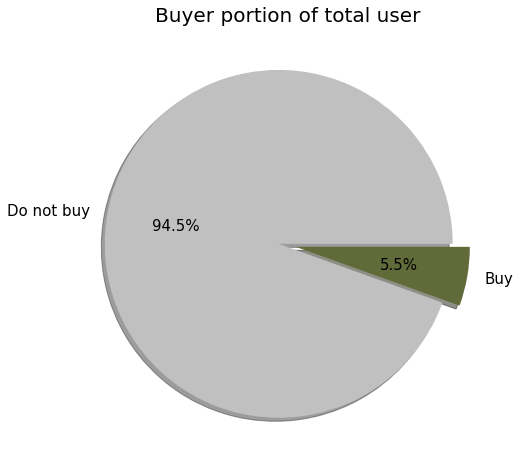

In [ ]:
plt.figure(figsize=(8,8))

# import matplotlib.pyplot as plt

# ratio = [34, 32, 16, 18]
labels = ['Do not buy', 'Buy']

explode = [0.05, 0.05]
# colors = ['silver', 'gold', 'whitesmoke', 'lightgray']
colors = ['silver', '#616B3A']

# plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.pie(list(BuyOrNot),labels=labels, autopct='%.1f%%',  explode=explode, shadow=True, colors=colors, textprops={"fontsize":15})
plt.title('Buyer portion of total user', fontsize = 20);

##### countryCode, country

- High cardinality
- skewness

In [ ]:
# data.plot.pie(autopct="%.1f%%");

# #groupby the data by delivery type
# data = deliveries.groupby("type")["del_tip"].sum()
# data

df_clean.groupby('countryCode').count().reset_index()
# country_cnt.plot.pie(autopct="%.1f%%")

,countryCode,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
0,ad,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1,ae,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
2,af,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
3,ag,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,ai,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,ws,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
195,yt,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
196,za,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
197,zm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_clean.sample(10)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
50080,-4375981449512233826,user,France,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,701,3197,106.57,8.88,fr
85147,-9127426479836263,user,Canada,en,3,8,0,0,0,0.0,0,0,M,1,mr,False,False,False,True,693,2854,95.13,7.93,ca
13228,-2384235641963179867,user,Taiwan,en,4,8,9,0,0,0.0,8,0,M,1,mr,True,False,True,False,99,2855,95.17,7.93,tw
82508,2852842514141721662,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,694,2855,95.17,7.93,us
11746,1885571326973974489,user,France,fr,4,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,696,2857,95.23,7.94,fr
74555,-1081912234855563153,user,Royaume-Uni,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,695,2856,95.20,7.93,gb
89740,4268709737086324002,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,M,1,mr,False,False,False,True,692,2853,95.10,7.92,us
77143,8875829958236607967,user,Royaume-Uni,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,695,2856,95.20,7.93,gb
68734,2518019123021144003,user,France,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,697,2858,95.27,7.94,fr
57108,3730644533523378878,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,True,False,True,True,620,3195,106.50,8.88,us


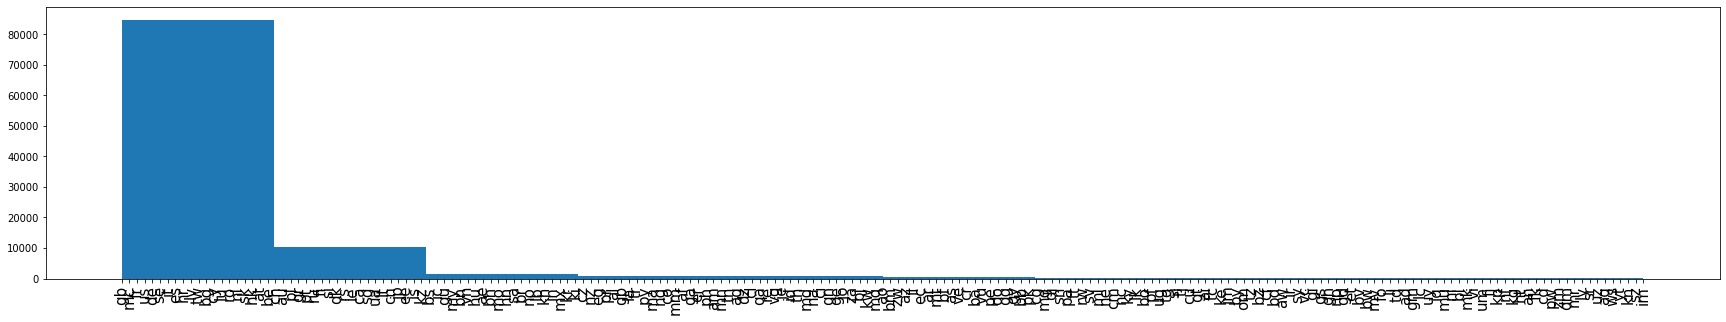

In [ ]:
plt.figure(figsize = (30,5))

# plt.hist(df_clean.countryCode,orientation='horizontal')
plt.hist(df_clean.countryCode)
# plt.xlabel('country', fontsize=20)
plt.xticks(rotation = 90, fontsize = 15);

(array([8.4798e+04, 1.0461e+04, 1.4060e+03, 8.9600e+02, 6.8600e+02,
        3.4600e+02, 1.4000e+02, 8.7000e+01, 6.6000e+01, 2.7000e+01]),
 array([  0. ,  19.8,  39.6,  59.4,  79.2,  99. , 118.8, 138.6, 158.4,
        178.2, 198. ]),
 <a list of 10 Patch objects>)

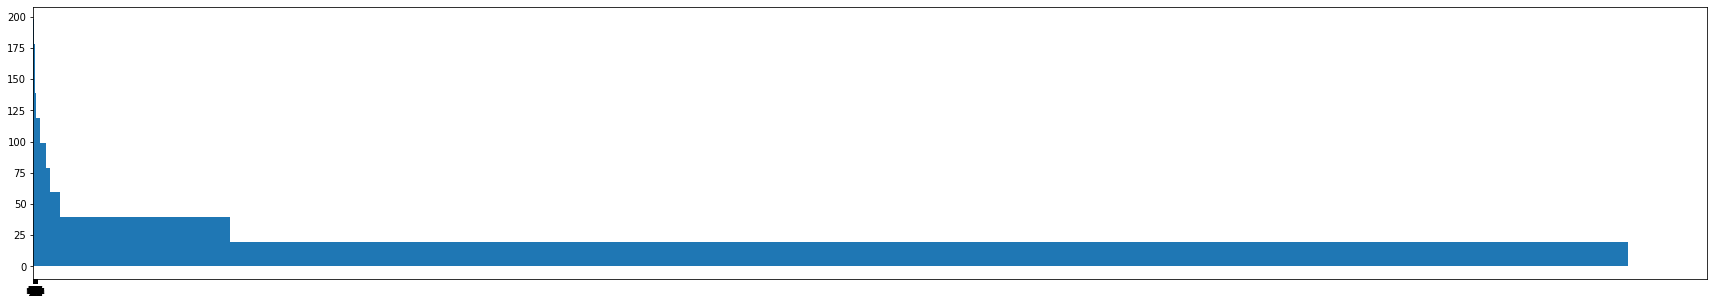

In [ ]:
plt.figure(figsize = (30,5))

plt.hist(df_clean.countryCode,orientation='horizontal')
# plt.hist(df_clean.countryCode)
# plt.xlabel('country', fontsize=20)
# plt.xticks(rotation = 90, fontsize = 15);

In [ ]:
df_clean.groupby('countryCode')['countryCode'].count().sort_values(ascending=False)

countryCode
fr    25135
us    20602
gb    11310
it     8015
de     6567
      ...  
gi        1
sr        1
sz        1
gs        1
pw        1
Name: countryCode, Length: 199, dtype: int64

In [ ]:
country_cnt = df_clean.groupby('countryCode')['countryCode'].count().sort_values(ascending=False)

In [ ]:
country_cnt[country_cnt > 50].sum()/country_cnt.sum()

0.9853103232133289

In [ ]:
country_cnt[country_cnt <=50].nunique()

39

In [ ]:
country_cnt[country_cnt <=50].index.unique()

Index(['co', 'cl', 'lv', 'qa', 'lt', 'ar', 'gp', 'al', 'mc', 'lb',
       ...
       'rw', 'ne', 'im', 'bl', 'sj', 'gi', 'sr', 'sz', 'gs', 'pw'],
      dtype='object', name='countryCode', length=143)

In [ ]:
country_cnt[country_cnt >50].index.unique()

Index(['fr', 'us', 'gb', 'it', 'de', 'es', 'au', 'dk', 'se', 'be', 'ca', 'nl',
       'ch', 'hk', 'fi', 'at', 'ru', 'ie', 'cn', 'ro', 'sg', 'gr', 'pt', 'pl',
       'mx', 'no', 'ma', 'jp', 'in', 'sa', 'kr', 'tw', 'ae', 'my', 'hr', 'nz',
       'lu', 'ua', 'tr', 'il', 'ph', 'br', 'tn', 'za', 'bg', 'th', 'kw', 'dz',
       'id', 'vn', 'hu', 'cz', 'cy', 'sk', 'rs', 're'],
      dtype='object', name='countryCode')

In [ ]:
country_cnt[country_cnt >1000].index.unique()

Index(['fr', 'us', 'gb', 'it', 'de', 'es', 'au', 'dk', 'se', 'be', 'ca', 'nl'], dtype='object', name='countryCode')

In [ ]:
country_cnt[country_cnt > 1000].sum()/country_cnt.sum()

0.8951705033716498

In [ ]:
df_clean.countryCode.describe()

count     98913
unique      199
top          fr
freq      25135
Name: countryCode, dtype: object

In [ ]:
df.loc[:,['country', 'countryCode']].drop_duplicates(keep='first')

,country,countryCode
0,Royaume-Uni,gb
1,Monaco,mc
2,France,fr
3,Etats-Unis,us
5,Allemagne,de
...,...,...
81876,Samoa,ws
84057,Mayotte,yt
87734,Saint Kitts et Nevis,kn
92805,Swaziland,sz


In [ ]:
country = df.loc[:,['country', 'countryCode']].drop_duplicates(keep='first').reset_index(drop=True)
country[country.countryCode.duplicated()]

,country,countryCode
193,Guyana,gy


In [ ]:
country.query('countryCode == "gy"')
# Guyana in English, Guyane in Frence

,country,countryCode
116,Guyane,gy
193,Guyana,gy


In [ ]:
df.country.nunique()

200

In [ ]:
df.countryCode.nunique()

199

##### productsPassRate
- right skewness (the mode of passrate is 0)

In [ ]:
drop_features = ['identifierHash', 'type','country', 'gender', 'civilityGenderId','hasAnyApp', 'seniorityAsMonths','seniorityAsYears']
df_clean = df_clean.drop(columns=drop_features)
df_clean.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityTitle,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,countryCode
0,en,147,10,77,26,174,74.0,104,1,mr,False,True,True,11,3196,gb
1,en,167,8,2,19,170,99.0,0,0,mrs,False,True,True,12,3204,mc
2,fr,137,13,60,33,163,94.0,10,3,mrs,False,True,False,11,3203,fr
3,en,131,10,14,122,152,92.0,7,0,mrs,False,True,False,12,3198,us
4,en,167,8,0,25,125,100.0,0,0,mrs,False,False,True,22,2854,us


In [ ]:
pd.reset_option('^display.')

In [ ]:
df_clean.sort_values(by='productsPassRate', ascending=False)

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityTitle,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,countryCode
381,fr,8,10,176,8,7,100.0,28,1,mrs,False,True,False,11,2854,fr
506,it,6,8,0,3,5,100.0,0,0,mr,False,False,True,13,2857,it
482,en,14,8,88,0,5,100.0,7,14,mrs,False,True,True,154,2859,us
483,fr,12,11,0,1,5,100.0,1,22,mrs,False,False,True,44,3205,fr
949,en,6,8,7,0,2,100.0,15,2,mrs,True,False,False,160,2855,nl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33590,fr,3,8,0,0,0,0.0,0,0,mr,False,False,True,654,3205,fr
33589,it,3,8,0,0,0,0.0,0,0,mrs,False,False,True,709,3205,it
33588,it,3,8,0,0,0,0.0,0,0,mrs,True,False,True,709,3205,it
33587,it,3,8,8,0,0,0.0,0,0,mrs,False,True,True,681,3205,it


(array([9.7979e+04, 0.0000e+00, 7.0000e+00, 1.2000e+01, 6.0000e+00,
        6.7000e+01, 9.6000e+01, 7.8000e+01, 1.2900e+02, 5.3900e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

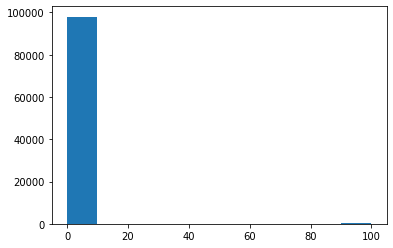

In [ ]:
plt.hist(df_clean.productsPassRate)

(array([    0.,     0.,     0.,     0.,     0., 97979.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

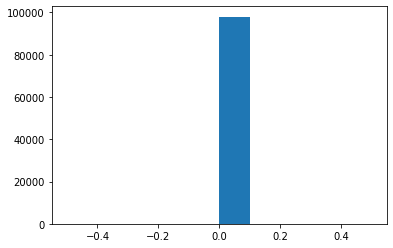

In [ ]:
plt.hist(df_clean.productsPassRate[(df_clean.productsPassRate==0)])

(array([  8.,  11.,   6.,  59.,  26.,  78.,  63.,  82., 102.,  58.]),
 array([25. , 32.4, 39.8, 47.2, 54.6, 62. , 69.4, 76.8, 84.2, 91.6, 99. ]),
 <a list of 10 Patch objects>)

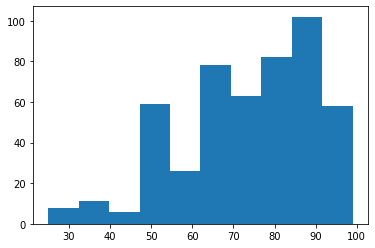

In [ ]:
plt.hist(df_clean.productsPassRate[(df_clean.productsPassRate>0) & (df_clean.productsPassRate<100)])

(array([ 7., 38., 25., 30.,  7., 40., 28., 13.,  7., 10.]),
 array([81. , 82.8, 84.6, 86.4, 88.2, 90. , 91.8, 93.6, 95.4, 97.2, 99. ]),
 <a list of 10 Patch objects>)

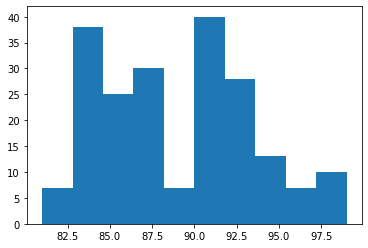

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_clean.productsPassRate[(df_clean.productsPassRate>80) & (df_clean.productsPassRate<100)])

(array([  0.,   0.,   0.,   0.,   0., 441.,   0.,   0.,   0.,   0.]),
 array([ 99.5,  99.6,  99.7,  99.8,  99.9, 100. , 100.1, 100.2, 100.3,
        100.4, 100.5]),
 <a list of 10 Patch objects>)

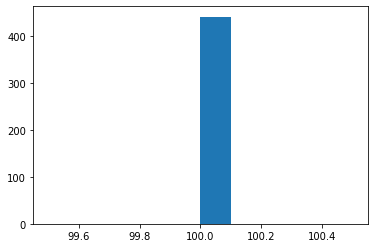

In [ ]:
plt.hist(df_clean.productsPassRate[df_clean.productsPassRate == 100])

In [ ]:
df_clean[df_clean.productsPassRate == 100]

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityTitle,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,countryCode
4,en,167,8,0,25,125,100.0,0,0,mrs,False,False,True,22,2854,us
14,en,123,8,1,117,86,100.0,0,0,mrs,False,False,True,55,2853,us
34,en,52,8,0,32,55,100.0,0,0,mrs,False,False,True,86,3205,gb
35,en,42,8,0,55,54,100.0,0,0,mrs,False,False,True,23,3203,gb
36,en,28,8,83,34,51,100.0,25,8,mrs,False,True,True,12,2854,gb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,en,3,8,32,5,2,100.0,1,0,mrs,False,True,False,13,2854,gb
1111,en,3,9,10,1,2,100.0,79,2,mrs,False,False,True,12,2854,bg
1113,fr,3,8,0,0,2,100.0,0,0,mrs,False,False,True,585,2853,fr
1114,fr,3,8,0,1,2,100.0,0,0,mr,False,False,True,183,2852,fr


In [ ]:
df_clean[(df_clean.productsPassRate >=80)&(df_clean.productsPassRate < 100)]

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityTitle,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,countryCode
1,en,167,8,2,19,170,99.0,0,0,mrs,False,True,True,12,3204,mc
2,fr,137,13,60,33,163,94.0,10,3,mrs,False,True,False,11,3203,fr
3,en,131,10,14,122,152,92.0,7,0,mrs,False,True,False,12,3198,us
5,de,130,12,1,47,123,91.0,0,0,mrs,False,True,False,11,3196,de
6,en,121,0,1140,31,108,94.0,531,105,miss,True,False,False,11,3198,se
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,en,7,8,17,1,5,80.0,0,0,mrs,True,False,True,59,2855,ro
502,en,6,10,13,4,5,80.0,117,85,mrs,False,False,False,11,3202,fi
515,fr,3,8,0,4,5,80.0,0,0,mrs,False,False,True,17,2852,fr
617,fr,5,8,1,2,4,80.0,0,0,mrs,False,True,False,23,2853,fr


In [ ]:
df_clean[(df_clean.productsPassRate >=0)&(df_clean.productsPassRate < 30)].sort_values(by='productsSold', ascending=False)

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityTitle,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,countryCode
60,en,94,9,5,10,33,28.0,0,0,mr,True,True,False,77,2858,it
276,fr,10,8,3,26,10,0.0,155,30,mrs,True,False,True,11,2853,fr
337,it,10,11,85,1,8,25.0,104,1,mrs,True,False,True,23,3198,it
339,en,9,8,0,6,8,0.0,0,0,mrs,False,False,True,665,3203,gb
357,en,40,10,83,0,7,0.0,0,0,mrs,False,True,False,604,3205,gb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34325,en,3,8,0,0,0,0.0,0,0,mrs,False,False,True,704,3200,us
34324,fr,3,8,0,0,0,0.0,0,0,mrs,False,False,True,367,3200,fr
34323,fr,3,8,0,0,0,0.0,0,0,mrs,False,False,True,704,3200,fr
34322,de,3,8,0,0,0,0.0,1,0,mrs,False,False,True,335,3200,de


##### Apps
- almost users don't use mobile application

In [ ]:
df.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

Text(0.5, 1.0, 'AndroidApp')

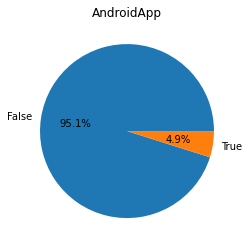

In [ ]:
labels = ['False', 'True']
plt.pie(df['hasAndroidApp'].value_counts(),labels=labels, autopct='%.1f%%')
plt.title('AndroidApp')

([<matplotlib.patches.Wedge at 0x7f1d448eeed0>,
 [Text(-1.0871405736197473, 0.16770621094559102, 'False'),
  Text(1.0871405716570235, -0.16770622366877183, 'True')],
 [Text(-0.5929857674289529, 0.09147611506123145, '95.1%'),
  Text(0.5929857663583764, -0.09147612200114826, '4.9%')])

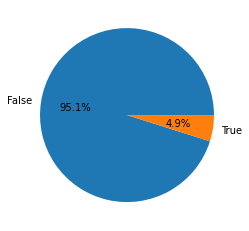

In [ ]:
labels = ['False', 'True']
plt.pie(df['hasAndroidApp'].value_counts(),labels=labels, autopct='%.1f%%')

In [ ]:
df['hasAndroidApp'].value_counts()

False    94094
True      4819
Name: hasAndroidApp, dtype: int64

Text(0.5, 1.0, 'IosApp')

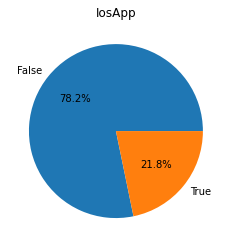

In [ ]:
labels = ['False', 'True']
plt.pie(df['hasIosApp'].value_counts(),labels=labels, autopct='%.1f%%')
plt.title('IosApp')

Text(0.5, 1.0, 'AnyApp')

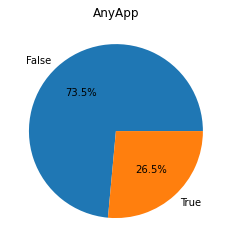

In [ ]:
labels = ['False', 'True']
plt.pie(df['hasAnyApp'].value_counts(),labels=labels, autopct='%.1f%%')
plt.title('AnyApp')

In [ ]:
df[df.hasAndroidApp == df.hasIosApp].hasIosApp.value_counts()

False    72739
True       172
Name: hasIosApp, dtype: int64

##### **Language**
- cardinality = 5개

In [ ]:
df.language.unique()

array(['en', 'fr', 'de', 'it', 'es'], dtype=object)

In [ ]:
df.query('language == "de"') # Deutsch

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
5,7631788075812383072,user,Allemagne,de,130,12,1,47,123,91.0,...,mrs,True,False,True,False,11,3196,106.53,8.88,de
16,1450851698857145434,user,Allemagne,de,48,16,599,22,82,89.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,de
61,-3756574628479963692,user,Allemagne,de,30,8,16,13,33,96.0,...,mrs,False,False,False,False,12,2857,95.23,7.94,de
122,-175545152996650839,user,Autriche,de,17,10,81,20,20,100.0,...,mrs,True,False,True,False,11,3204,106.80,8.90,at
163,-5465827034815946017,user,Allemagne,de,16,8,1,4,15,100.0,...,mrs,False,False,False,True,42,3204,106.80,8.90,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98844,1345585613342184085,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,708,3204,106.80,8.90,de
98871,8895674318039298262,user,Etats-Unis,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,708,3204,106.80,8.90,us
98880,-2897312933061559975,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,True,False,True,True,626,3204,106.80,8.90,de
98884,3431929152647728177,user,Allemagne,de,3,8,1,0,0,0.0,...,mrs,True,False,True,True,176,3204,106.80,8.90,de


(array([51564.,     0., 26372.,     0.,     0.,  7178.,     0.,  7766.,
            0.,  6033.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

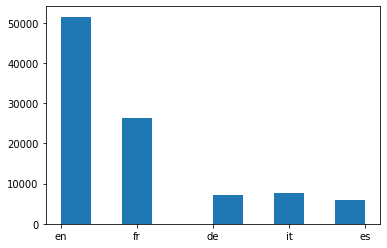

In [ ]:
plt.hist(df.language)

##### Others

**identifierHash**

In [ ]:
df.identifierHash.nunique()

98913

**Gender**

In [ ]:
df.civilityTitle.unique()

array(['mr', 'mrs', 'miss'], dtype=object)

In [ ]:
df.civilityGenderId.unique()

array([1, 2, 3])

In [ ]:
# pd.set_option('display.max_rows', None)
pd.reset_option('^display.')

**total features**

In [ ]:
df.sample(10)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
26970,3371294416212309224,user,Australie,en,3,8,1,0,0,0.0,...,mr,True,False,True,True,454,3201,106.70,8.89,au
15456,-605022996011352592,user,Espagne,es,3,8,0,0,0,0.0,...,mrs,True,False,True,False,18,3204,106.80,8.90,es
2010,1881882177834631277,user,Danemark,en,3,8,0,0,1,0.0,...,mrs,False,False,False,True,93,2853,95.10,7.92,dk
9253,8251402198455537214,user,Australie,en,4,8,0,0,0,0.0,...,mrs,True,False,True,True,701,3197,106.57,8.88,au
3316,2438728989381123877,user,Etats-Unis,en,6,21,126,0,0,0.0,...,mrs,True,True,True,False,14,3202,106.73,8.89,us
75226,8568707782935739428,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,217,2856,95.20,7.93,de
13673,-1064447551894692447,user,Royaume-Uni,en,4,8,0,0,0,0.0,...,mr,False,False,False,True,692,2853,95.10,7.92,gb
39633,421415652061053861,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,703,3199,106.63,8.89,de
16891,-1673584893845233385,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,707,3203,106.77,8.90,de
39119,777461431535147992,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,701,3199,106.63,8.89,it


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
identifierHash,98913.0,NaN,NaN,NaN,-6692038994754884.0,5330806880381532160.0,-9223101125946752000.0,-4622894616983282688.0,-1337988846375572.0,4616388117635352576.0,9223330728320224256.0
type,98913,1,user,98913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,98913,200,France,25135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language,98913,5,en,51564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socialNbFollowers,98913.0,NaN,NaN,NaN,3.432269,3.882383,3.0,3.0,3.0,3.0,744.0
socialNbFollows,98913.0,NaN,NaN,NaN,8.425677,52.839572,0.0,8.0,8.0,8.0,13764.0
socialProductsLiked,98913.0,NaN,NaN,NaN,4.420743,181.030569,0.0,0.0,0.0,0.0,51671.0
productsListed,98913.0,NaN,NaN,NaN,0.093304,2.050144,0.0,0.0,0.0,0.0,244.0
productsSold,98913.0,NaN,NaN,NaN,0.121592,2.126895,0.0,0.0,0.0,0.0,174.0
productsPassRate,98913.0,NaN,NaN,NaN,0.812303,8.500205,0.0,0.0,0.0,0.0,100.0


In [ ]:
df_clean = df.copy()

#### 🏃Drop unusable variables


In [ ]:
df_clean.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode',
       'Buy'],
      dtype='object')

In [ ]:
# drop duplicate, high cardinality, meaningless features
drop_features = ['identifierHash', 'type', 'country', 'countryCode', 'gender', 'civilityTitle', 'hasAnyApp', 'seniorityAsMonths', 'seniorityAsYears']

In [ ]:
df_clean = df_clean.drop( columns = drop_features, axis=1)

In [ ]:
df_clean.columns

Index(['language', 'socialNbFollowers', 'socialNbFollows',
       'socialProductsLiked', 'productsListed', 'productsSold',
       'productsPassRate', 'productsWished', 'productsBought',
       'civilityGenderId', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture',
       'daysSinceLastLogin', 'seniority'],
      dtype='object')

In [ ]:
df_clean.shape

(98913, 15)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   language             98913 non-null  object 
 1   socialNbFollowers    98913 non-null  int64  
 2   socialNbFollows      98913 non-null  int64  
 3   socialProductsLiked  98913 non-null  int64  
 4   productsListed       98913 non-null  int64  
 5   productsSold         98913 non-null  int64  
 6   productsPassRate     98913 non-null  float64
 7   productsWished       98913 non-null  int64  
 8   productsBought       98913 non-null  int64  
 9   civilityGenderId     98913 non-null  int64  
 10  hasAndroidApp        98913 non-null  bool   
 11  hasIosApp            98913 non-null  bool   
 12  hasProfilePicture    98913 non-null  bool   
 13  daysSinceLastLogin   98913 non-null  int64  
 14  seniority            98913 non-null  int64  
dtypes: bool(3), float64(1), int64(10), o

In [ ]:
df_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
language,98913,5,en,51564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socialNbFollowers,98913.0,NaN,NaN,NaN,3.432269,3.882383,3.0,3.0,3.0,3.0,744.0
socialNbFollows,98913.0,NaN,NaN,NaN,8.425677,52.839572,0.0,8.0,8.0,8.0,13764.0
socialProductsLiked,98913.0,NaN,NaN,NaN,4.420743,181.030569,0.0,0.0,0.0,0.0,51671.0
productsListed,98913.0,NaN,NaN,NaN,0.093304,2.050144,0.0,0.0,0.0,0.0,244.0
productsSold,98913.0,NaN,NaN,NaN,0.121592,2.126895,0.0,0.0,0.0,0.0,174.0
productsPassRate,98913.0,NaN,NaN,NaN,0.812303,8.500205,0.0,0.0,0.0,0.0,100.0
productsWished,98913.0,NaN,NaN,NaN,1.562595,25.192793,0.0,0.0,0.0,0.0,2635.0
productsBought,98913.0,NaN,NaN,NaN,0.171929,2.332266,0.0,0.0,0.0,0.0,405.0
civilityGenderId,98913.0,NaN,NaN,NaN,1.773993,0.428679,1.0,2.0,2.0,2.0,3.0


### Model

In [ ]:
# df_clean = df.copy()

In [ ]:
# df_clean.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority
0,en,147,10,77,26,174,74.0,104,1,1,False,True,True,11,3196
1,en,167,8,2,19,170,99.0,0,0,2,False,True,True,12,3204
2,fr,137,13,60,33,163,94.0,10,3,2,False,True,False,11,3203
3,en,131,10,14,122,152,92.0,7,0,2,False,True,False,12,3198
4,en,167,8,0,25,125,100.0,0,0,2,False,False,True,22,2854


#### Clustering

In [ ]:
# scale 안 했을 때

# test = df_clean[['productsSold', 'productsBought', 'productsWished','productsListed']]
test = df_clean[['productsSold', 'productsBought']]
test

In [ ]:
from sklearn.cluster import KMeans

sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1) # centroid가 1, 2, 3, ... 9 개인 경우, random_state = 1 is seed
  kmeans.fit(test)    # rfm_scaled를 fit 시킨다, 평균 분산 알아냄
  sse[k] = kmeans.inertia_ # 중심까지의 거리 제곱의 합이 딕셔너리에 k = 1, 2, 3 .. 인 경우로 들어감

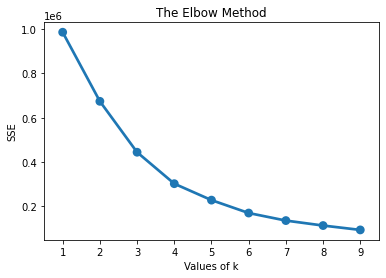

In [ ]:
# 결과 시각화

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# k=4 최종 모델 학습
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(test)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

test_k4 = test.assign(Cluster = cluster_labels)

In [ ]:
test_k4

,productsSold,productsBought,Cluster
0,174,1,2
1,170,0,2
2,163,3,2
3,152,0,2
4,125,0,2
...,...,...,...
98908,0,0,0
98909,0,0,0
98910,0,0,0
98911,0,0,0


In [ ]:
# test_k4.groupby(['Cluster']).agg({'productsSold':['mean','max'], 'productsBought':['mean','max'],'productsWished':['mean','max'], 'productsListed':['mean','max']}).round(0)
test_k4.groupby(['Cluster']).agg({'productsSold':['min','mean','max','count'], 'productsBought':['min','mean','max','count']}).round(0)

productsSold                   productsBought                   
                 min  mean  max  count            min   mean  max  count
Cluster                                                                 
0                  0   0.0   35  98729              0    0.0   17  98729
1                  1   7.0   12      3            174  286.0  405      3
2                 37  73.0  174     54              0    5.0  105     54
3                  0   3.0   69    127             18   34.0  115    127

In [ ]:
test.productsSold.sum() == test.productsBought.sum()

False

In [ ]:
print(test.productsSold.sum(), test.productsBought.sum())
print(test.productsSold.sum()- test.productsBought.sum()) # 일정 기간에서 뽑은 데이터가 아닌 것으로 보임

12027 17006
-4979


(array([9.8729e+04, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 5.4000e+01, 0.0000e+00, 0.0000e+00, 1.2700e+02]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

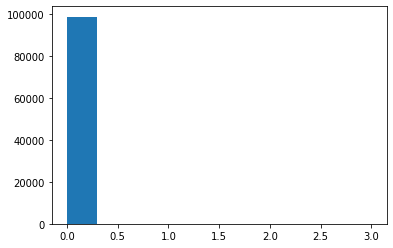

In [ ]:
# test_k4.Cluster.
plt.hist(test_k4.Cluster)

In [ ]:
test_k4.Cluster.value_counts()

0    98729
3      127
2       54
1        3
Name: Cluster, dtype: int64

In [ ]:
test_k4.query('Cluster==1') # outlier로 제거

,productsSold,productsBought,Cluster
210,12,279,1
324,8,174,1
1144,1,405,1


In [ ]:
# test_k4.query('Cluster==2').sum() # Seller group
test_k4.query('Cluster==2').head(10) # Seller group


,productsSold,productsBought,Cluster
0,174,1,2
1,170,0,2
2,163,3,2
3,152,0,2
4,125,0,2
5,123,0,2
6,108,105,2
7,106,0,2
8,104,0,2
9,92,2,2


In [ ]:
# test_k4.query('Cluster==3').sum() # Buyer group
print(test_k4.query('Cluster==3').sum())

test_k4.query('Cluster==3').sample(10) # Buyer group who sometimes sell

productsSold       406
productsBought    4372
Cluster            381
dtype: int64


,productsSold,productsBought,Cluster
403,6,65,3
1131,1,57,3
9951,0,19,3
421,6,27,3
3002,0,36,3
6455,0,27,3
7741,0,33,3
407,6,40,3
4946,0,24,3
351,8,32,3


In [ ]:
test_k4.query('Cluster==0').sum() # General group

productsSold       7666
productsBought    11503
Cluster               0
dtype: int64


- group 0 : Inactive group
- group 1 : Buyer group
- group 2 : Seller group
- group 3 : Less inactive group 

In [ ]:
# test_k4.Cluster
test_k4_c = df_clean.join([test_k4.Cluster], how='inner')


In [ ]:
# drop Cluster =1 as outlier

# df.drop(df[(df['Unit_Price'] >400) & (df['Unit_Price'] < 600)].index, inplace=True)

test_k4_c.drop(test_k4_c[(test_k4_c['Cluster'] == 1)].index, inplace=True)

In [ ]:
test_k4 = test_k4_c
test_k4.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Cluster
0,en,147,10,77,26,174,74.0,104,1,1,False,True,True,11,3196,2
1,en,167,8,2,19,170,99.0,0,0,2,False,True,True,12,3204,2
2,fr,137,13,60,33,163,94.0,10,3,2,False,True,False,11,3203,2
3,en,131,10,14,122,152,92.0,7,0,2,False,True,False,12,3198,2
4,en,167,8,0,25,125,100.0,0,0,2,False,False,True,22,2854,2


#### Ordinal encode ( Data scaling, Log transformation )

In [ ]:
categorical_features = ['language', 'civilityGenderId','hasAndroidApp','hasIosApp','hasProfilePicture']

In [ ]:
df_clean[categorical_features]

,language,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture
0,en,1,False,True,True
1,en,2,False,True,True
2,fr,2,False,True,False
3,en,2,False,True,False
4,en,2,False,False,True
...,...,...,...,...,...
98908,fr,1,False,False,True
98909,fr,1,False,True,True
98910,en,1,True,False,True
98911,it,2,False,False,True


In [ ]:
from category_encoders import OrdinalEncoder

enc = OrdinalEncoder()
df_clean_enc = enc.fit_transform(df_clean)
df_clean_enc.head() # changed language data type to ordinal number

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,1,1,1,147,10,77,26,174,74.0,...,1,True,False,True,True,11,3196,106.53,8.88,1
1,2347567364561867620,1,2,1,167,8,2,19,170,99.0,...,2,True,False,True,True,12,3204,106.80,8.90,2
2,6870940546848049750,1,3,2,137,13,60,33,163,94.0,...,2,True,False,True,False,11,3203,106.77,8.90,3
3,-4640272621319568052,1,4,1,131,10,14,122,152,92.0,...,2,True,False,True,False,12,3198,106.60,8.88,4
4,-5175830994878542658,1,4,1,167,8,0,25,125,100.0,...,2,False,False,False,True,22,2854,95.13,7.93,4


### 🏃Model for Buyer

#### Target - productsBought

In [ ]:
# # 영어를 한글로 변환한 뒤, 성별을 category 데이터 타입으로 변화
# patients_clean.성별 = patients_clean.성별.replace({'male':'남', 'female':'여'})
# patients_clean.성별 = patients_clean.성별.astype('category')

# def func(x) :
#     if x > 5 :
#         return "Large"
#     else :
#         return "Small"
# iris["new_columns"] = iris["sepal_length"].apply(lambda x : func(x))

def buy(x):
  if x > 0:
    return 1
  else:
    return 0 

df_clean['Buy'] = df_clean['productsBought'].apply(lambda x :buy(x))


In [ ]:
df_B = df_clean.drop('productsBought', axis=1)

In [ ]:
df_B.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Buy
0,en,147,10,77,26,174,74.0,104,1,False,True,True,11,3196,1
1,en,167,8,2,19,170,99.0,0,2,False,True,True,12,3204,0
2,fr,137,13,60,33,163,94.0,10,2,False,True,False,11,3203,1
3,en,131,10,14,122,152,92.0,7,2,False,True,False,12,3198,0
4,en,167,8,0,25,125,100.0,0,2,False,False,True,22,2854,0


 🥕 <font color ='Orange'> **hold out, 데이터 셋 수가 적지 않기 때문에 cross validation을 쓰지 않고, hold out을 씀** </font>

In [ ]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train.drop(columns = target)
y_val = val[target]
X_val = val.drop(columns = target)
y_test = test[target]
X_test = test.drop(columns = target)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 14) (63304,) (15826, 14) (15826,) (19783, 14) (19783,)


#### Baseline (Target-productsBought)

 🥕 <font color ='Orange'> **Logistic regression으로 해야하나.. 지금 mode** </font>

In [ ]:
baseline = len(y_train)*[y_train.mode()[0]]

In [ ]:
# baseline score
y_train.value_counts(normalize=True).max().round(2)

0.95

 🥕 <font color ='Orange'> **Imbalance target이라서 score를 confusion matrix, recall로 확인** </font>

In [ ]:
# Baseline (항상 Negative, 0으로 판단하는 경우)

y_true0 = y_val.value_counts()[0]
y_true1 = y_val.value_counts()[1]
fn = len(y_val) - y_true0
base = pd.DataFrame(index = ['True 0', 'True1'], data = {'Predicted 0':[y_true0, fn], 'Predicted 1':[0,0]})

base

,Predicted 0,Predicted 1
True 0,14959,0
True1,867,0


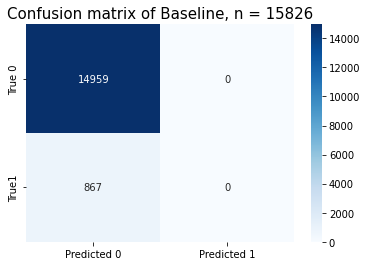

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(base, cmap=plt.cm.Blues, annot=True, fmt="d")                 # fmt ="d"로 e 단위를 쓰지 않고, 정수형을 씀   # cmap은 color mapping
plt.title(f'Confusion matrix of Baseline, n = {len(y_val)}', fontsize=15)
plt.show()

 🥕 <font color ='Orange'> **baseline에서 recall = 0** </font>

#### XGBoost

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(                    # booster를 지정하지 않으면, default 는 Gradient Boosting Decision Tree model
        objective="binary:logistic",  # target이 yes or no
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,  # n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용 (n_jobs=4로 했는데 -1로 지정한 것과 성능이 똑같다면, PC의 코어가 4개이기 때문)
        max_depth=7,
        learning_rate=0.1,
    ),
)
print(pipe)

# 모델을 학습합니다.
pipe.fit(X_train, y_train)

# 정확도를 확인합니다.
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
print("검증 정확도", pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='error', max_depth=7,
                               n_estimators=200, n_jobs=-1, random_state=42))])
검증 정확도 0.9533678756476683
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14959
           1       0.67      0.30      0.41       867

    accuracy                           0.95     15826
   macro avg       0.81      0.65      0.69     15826
weighted avg       0.94      0.95      0.94     15826



In [ ]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.9529887526854544


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18699
           1       0.66      0.29      0.41      1084

    accuracy                           0.95     19783
   macro avg       0.81      0.64      0.69     19783
weighted avg       0.94      0.95      0.94     19783



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


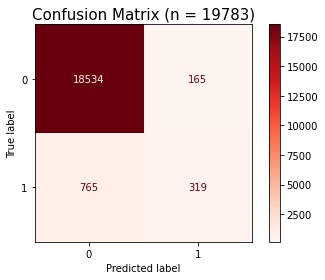

AUC: 0.8996845343072394


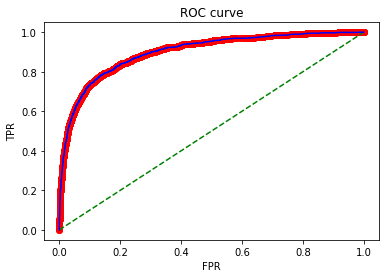

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


print(classification_report(y_test, pipe.predict(X_test)))

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

 🥕 <font color ='Orange'> **XGBoost에서 score 기준을 AUC로 하면 recall 0.29, 1-accuracy로 하면 recall 0.32** </font>

🥕 <font color ='Orange'> **(Accurcay 성능이 너무 좋으니까,) feature importance 확인** </font>

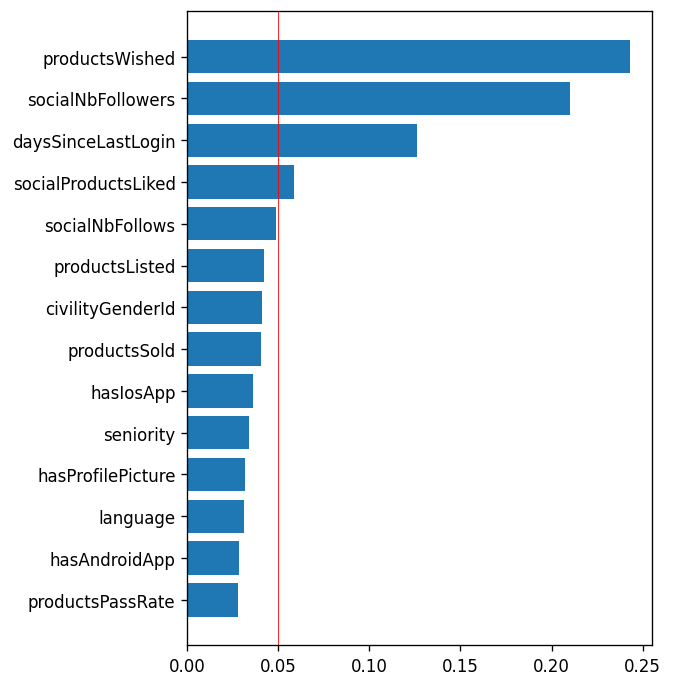

In [ ]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)  # feature name, feature importance를 리스트로
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True) # feature importance value 기준 내림차순(reverse=True)

plt.figure(figsize=(5, 7), dpi=120) # dpi(dot per inch)는 해상도

# [(feature 이름i, feature importance 값i)]에서 *로 원소 하나씩 꺼내서 list로 바꿈
# [feature 이름, feature importance 값i]를 *로 하나씩 꺼내서 barh (y축, x축)에 추가함
plt.barh(*list(zip(*feature_importances[::-1]))) 
plt.axvline(0.05, color="red", linewidth=0.5) # vertical line을 그림

🥕 <font color ='Orange'> **Activity가 높아질 수록 구매로 이어진다는 것을 알 수 있음, Selling 제외하고, activity와 무관한 특성을 제거하고 모델을 다시 확인** </font>

In [ ]:
# feature_importances[0:5]
activity_features = ['productsWished','socialNbFollowers','daysSinceLastLogin','socialNbFollows','socialProductsLiked']

In [ ]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train[activity_features]
y_val = val[target]
X_val = val[activity_features]
y_test = test[target]
X_test = test[activity_features]

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 5) (63304,) (15826, 5) (15826,) (19783, 5) (19783,)


In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(                    # booster를 지정하지 않으면, default 는 Gradient Boosting Decision Tree model
        objective="binary:logistic",  # target이 yes or no
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,  # n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용 (n_jobs=4로 했는데 -1로 지정한 것과 성능이 똑같다면, PC의 코어가 4개이기 때문)
        max_depth=7,
        learning_rate=0.1,
    ),
)
print(pipe)

# 모델을 학습합니다.
pipe.fit(X_train, y_train)

# 정확도를 확인합니다.
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
print("검증 정확도", pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='error', max_depth=7,
                               n_estimators=200, n_jobs=-1, random_state=42))])
검증 정확도 0.9490711487425755
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14959
           1       0.59      0.23      0.33       867

    accuracy                           0.95     15826
   macro avg       0.77      0.61      0.65     15826
weighted avg       0.94      0.95      0.94     15826



🥕 <font color ='Orange'> **Activity feature만으로 평가하니까, recall이 오히려 떨어짐 0.32에서 0.24 </br> score auc로 다시 확인** </font>

In [ ]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.9493870845444206


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18699
           1       0.62      0.24      0.35      1084

    accuracy                           0.95     19783
   macro avg       0.79      0.62      0.66     19783
weighted avg       0.94      0.95      0.94     19783



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


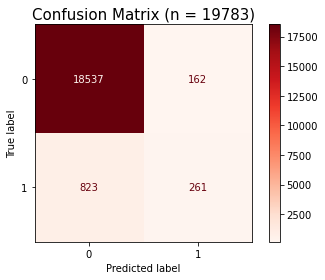

AUC: 0.8876850815275359


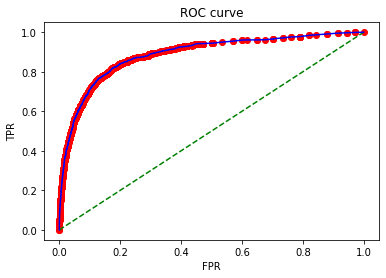

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **Activity feature만으로 평가하니까, score auc로 해봐도 score가 0.29에서 0.27로 떨어짐** </font>

🥕 <font color ='Orange'> **Crossweight을 넣어서 다시 성능 확인** </font>

In [ ]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(), # 가중치를 균일하게 조정
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.844685959812966


              precision    recall  f1-score   support

           0       0.99      0.84      0.91     18699
           1       0.23      0.78      0.35      1084

    accuracy                           0.84     19783
   macro avg       0.61      0.81      0.63     19783
weighted avg       0.94      0.84      0.88     19783



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


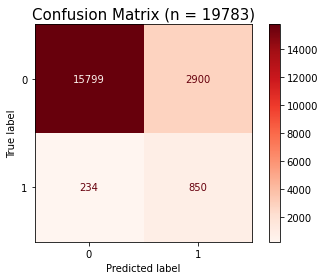

AUC: 0.8819487406730316


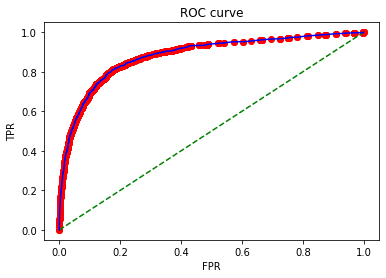

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **Crossweight을 넣으니, 성능이 많이 올랐음! recall 0.27에서 0.75 </br> activity_feature만, cross weight을 줬을 떄의 성능** </font>

🥕 <font color ='Orange'> **모든 feature, cross weight으로 다시 확인** </font>

In [ ]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train.drop(columns=target)
y_val = val[target]
X_val = val.drop(columns=target)
y_test = test[target]
X_test = test.drop(columns=target)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 14) (63304,) (15826, 14) (15826,) (19783, 14) (19783,)


In [ ]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(), # 가중치를 균일하게 조정
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.8637052950840389


              precision    recall  f1-score   support

           0       0.99      0.87      0.93     18699
           1       0.26      0.79      0.40      1084

    accuracy                           0.87     19783
   macro avg       0.63      0.83      0.66     19783
weighted avg       0.95      0.87      0.90     19783



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


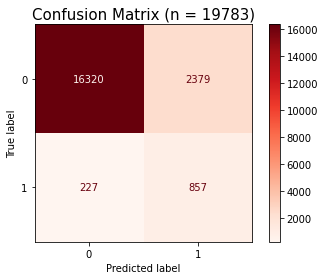

AUC: 0.9122792100293857


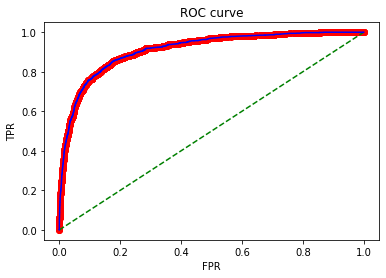

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **"모든 feature", cross weight을 넣으면 recall이 0.75에서 0.77로 증가** </font>

In [ ]:
!pip3 install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 56.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3030dd53863c74f9e2d7b7f547198ee1b68784005a24f1c32e75b71343feb96c
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


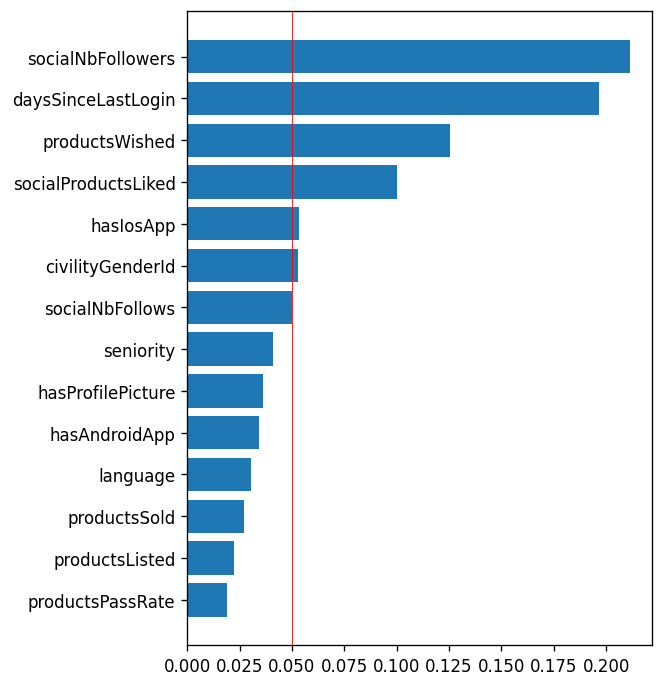

In [ ]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)  # feature name, feature importance를 리스트로
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True) # feature importance value 기준 내림차순(reverse=True)

plt.figure(figsize=(5, 7), dpi=120) # dpi(dot per inch)는 해상도

# [(feature 이름i, feature importance 값i)]에서 *로 원소 하나씩 꺼내서 list로 바꿈
# [feature 이름, feature importance 값i]를 *로 하나씩 꺼내서 barh (y축, x축)에 추가함
plt.barh(*list(zip(*feature_importances[::-1]))) 
plt.axvline(0.05, color="red", linewidth=0.5) # vertical line을 그림

🥕 <font color ='Orange'> **"모든 feature", cross weight을 넣으면 feature importance가 달라짐, Follwers가 가장 중요. 구매자에게 왜 follwers가 많은거지** </font>

🥕 <font color ='Orange'> **Seller관련한 feature drop (cross weight)으로 확인** </font>

In [ ]:
Seller_features = ['productsListed','productsSold','productsPassRate']


In [ ]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split
Seller_features = Seller_features + [target]

y_train = train[target]
X_train = train.drop(columns=Seller_features)
y_val = val[target]
X_val = val.drop(columns=Seller_features)
y_test = test[target]
X_test = test.drop(columns=Seller_features)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 11) (63304,) (15826, 11) (15826,) (19783, 11) (19783,)


In [ ]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(), # 가중치를 균일하게 조정
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.8577657020093516


              precision    recall  f1-score   support

           0       0.99      0.87      0.92     18699
           1       0.25      0.78      0.38      1084

    accuracy                           0.86     19783
   macro avg       0.62      0.82      0.65     19783
weighted avg       0.95      0.86      0.89     19783



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


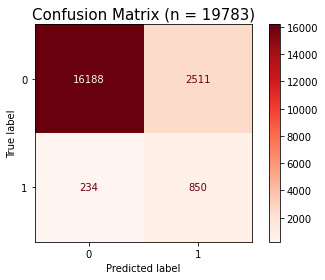

AUC: 0.9025230052557224


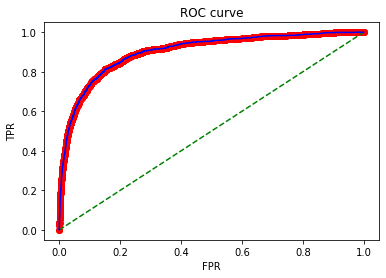

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

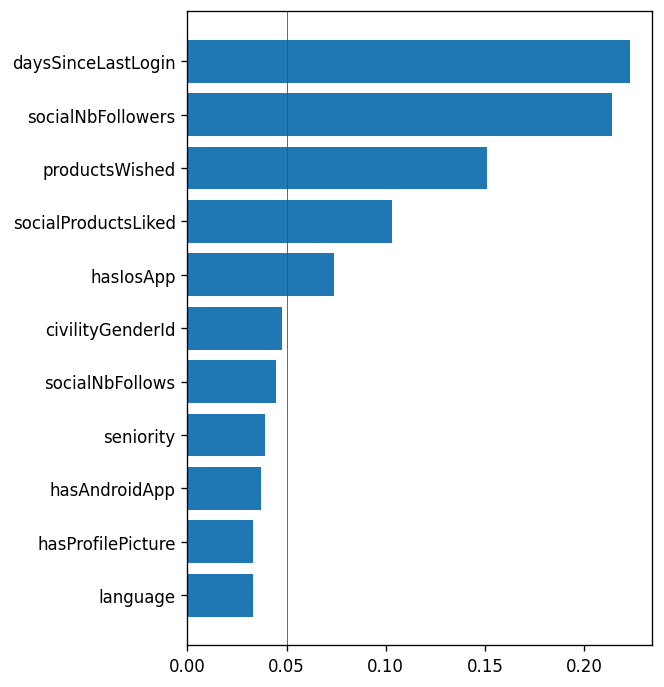

In [ ]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)  # feature name, feature importance를 리스트로
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True) # feature importance value 기준 내림차순(reverse=True)

plt.figure(figsize=(5, 7), dpi=120) # dpi(dot per inch)는 해상도

# [(feature 이름i, feature importance 값i)]에서 *로 원소 하나씩 꺼내서 list로 바꿈
# [feature 이름, feature importance 값i]를 *로 하나씩 꺼내서 barh (y축, x축)에 추가함
plt.barh(*list(zip(*feature_importances[::-1]))) 
plt.axvline(0.05, color="red", linewidth=0.5) # vertical line을 그림

🥕 <font color ='Orange'> **Seller관련한 feature drop (cross weight)하면 recall은 0.77 그대로 유지됨 (precision이 0.25에서 0.26으로 조금 증가)** </font>

In [ ]:
df_B.socialNbFollowers.describe()

count    98913.000000
mean         3.432269
std          3.882383
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max        744.000000
Name: socialNbFollowers, dtype: float64

In [ ]:
df_B.query('(Buy ==1)').sort_values(by='socialNbFollowers', ascending=True).sample(10)


,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Buy
22641,fr,3,8,5,0,0,0.0,0,1,False,True,True,12,3202,1
9323,en,4,8,112,0,0,0.0,0,2,False,True,True,17,3197,1
14142,en,4,8,4,0,0,0.0,1,3,True,False,True,632,3204,1
1226,en,9,22,23,0,1,0.0,6,2,False,True,False,98,3199,1
33346,fr,3,8,0,0,0,0.0,0,1,False,False,True,688,3205,1
5725,en,5,8,1,0,0,0.0,0,2,False,False,True,380,2855,1
70291,fr,3,8,0,0,0,0.0,0,2,False,False,True,696,2857,1
2205,it,17,12,3,0,0,0.0,261,1,True,True,True,11,2853,1
48549,fr,3,8,0,0,0,0.0,0,2,False,False,True,315,3197,1
62955,en,3,8,1,0,0,0.0,0,2,False,False,True,59,2859,1


In [ ]:
df_B.query('(socialNbFollowers >0) &(Buy ==1)').sort_values(by='socialNbFollowers', ascending=False).sample(10)

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Buy
81160,it,3,8,0,0,0,0.0,1,1,False,False,True,693,2855,1
3727,en,6,8,165,0,0,0.0,147,2,False,False,True,621,2856,1
24257,en,3,8,18,0,0,0.0,7,2,False,False,True,15,3205,1
7025,de,4,8,32,0,0,0.0,2,1,False,True,True,11,3200,1
9971,en,4,8,2,0,0,0.0,0,2,False,True,True,645,2859,1
2837,es,8,8,0,0,0,0.0,0,2,False,False,True,469,2856,1
4710,en,5,8,0,0,0,0.0,0,1,False,False,True,59,3205,1
2044,en,36,60,1078,0,0,0.0,2635,2,False,True,True,12,3205,1
13232,it,4,8,0,0,0,0.0,0,1,False,False,True,185,2855,1
43917,en,3,8,1,0,0,0.0,0,2,False,False,True,668,3205,1


🥕 <font color ='Orange'> **socialNbFollowers를 ICE로 그려보자, 도대체 Buy랑 무슨 상관인건지** </font>

In [ ]:
# 데이터셋(data), 분석할 데이터의 index(data_index), 변화를 확인할 특성명(target_feature), 바꿔넣어 볼 특성의 범위(target_feature_range)를 입력하면
# 해당 범위에서 모델의 예측 양상의 변화를 반환하는 함수를 작성합니다.
def get_ice_plot_data(data, data_index, target_feature, target_feature_range):
    one_datapoint = data.iloc[[data_index]].copy()
    results = []

    for target_value in target_feature_range:
        one_datapoint[target_feature] = target_value
        one_datapoint_pred_proba = pipe.predict_proba(one_datapoint)[:, 1]  # 0이 될 확률[:,0] 1이 될 확률[:,1]
        results.append(one_datapoint_pred_proba.item())  # element를 추가한다
    results = np.array(results)
    return target_feature_range, results - results[0]  # np.array + scaler = np.array

In [ ]:
X_val.info()  # ICE plot 그릴 때, object type이 껴있으면 에러가 남, ordinal encoding까지 해야 된다

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15826 entries, 64765 to 69092
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   language             15826 non-null  object
 1   socialNbFollowers    15826 non-null  int64 
 2   socialNbFollows      15826 non-null  int64 
 3   socialProductsLiked  15826 non-null  int64 
 4   productsWished       15826 non-null  int64 
 5   civilityGenderId     15826 non-null  int64 
 6   hasAndroidApp        15826 non-null  bool  
 7   hasIosApp            15826 non-null  bool  
 8   hasProfilePicture    15826 non-null  bool  
 9   daysSinceLastLogin   15826 non-null  int64 
 10  seniority            15826 non-null  int64 
dtypes: bool(3), int64(7), object(1)
memory usage: 1.1+ MB


100%|██████████| 4/4 [00:00<00:00, 23.26it/s]


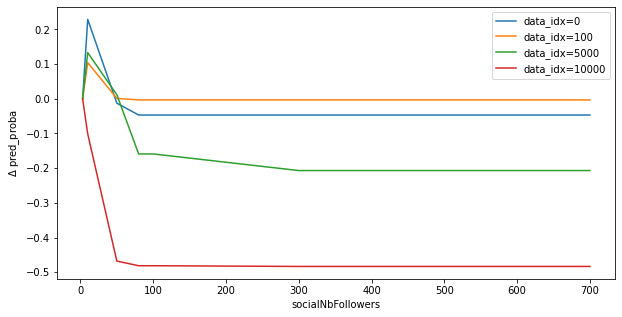

In [ ]:
plt.figure(figsize=(10,5))

from tqdm import tqdm    # tqdm: Python에서 tqdm 라이브러리를 이용한 작업진행률 표시

target_feature = "socialNbFollowers"
# target_feature_range = range(X_val["socialNbFollowers"].min(), X_val["socialNbFollowers"].max() + 1)
target_feature_range = [3, 10, 50, 80, 100, 300, 500, 700]


# for data_index in tqdm(range(len(X_val))):
for data_index in tqdm([0,100, 5000, 10000]):

    plt.plot(
        *get_ice_plot_data(
            X_val, data_index, target_feature, target_feature_range
        ),
        label=f"data_idx={data_index}",
    )


plt.xlabel(target_feature)
plt.ylabel("$\Delta$ pred_proba")
plt.legend()

In [ ]:
X_val.iloc[[0,100, 5000, 10000]]

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority
64765,en,3,8,0,0,2,False,False,True,698,2859
32111,en,3,8,1,0,2,False,True,True,704,3200
75612,en,3,8,14,10,2,False,False,True,37,2856
12562,en,4,10,0,0,2,False,False,True,29,2857


In [ ]:
X_val

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority
64765,en,3,8,0,0,2,False,False,True,698,2859
59469,fr,3,8,0,0,1,False,True,True,696,3195
65973,en,3,8,0,0,1,False,True,True,697,2858
3511,fr,6,10,47,18,2,False,True,True,16,3197
89253,en,3,8,0,0,2,False,False,True,692,2853
...,...,...,...,...,...,...,...,...,...,...,...
26492,en,3,8,0,0,2,False,True,True,689,3201
78857,en,3,8,0,0,2,False,False,True,694,2855
82920,es,3,8,0,0,2,False,False,True,693,2854
39309,en,3,8,0,0,2,False,True,True,703,3199


100%|██████████| 4/4 [00:00<00:00, 29.95it/s]


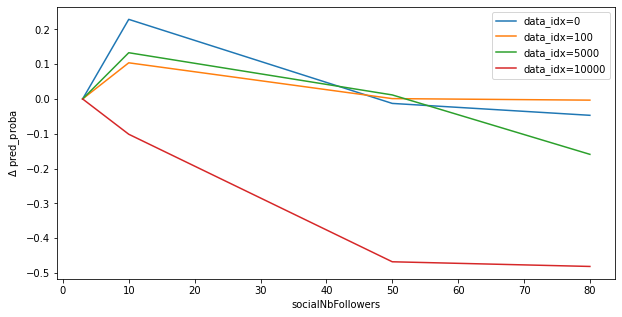

In [ ]:
plt.figure(figsize=(10,5))

from tqdm import tqdm    # tqdm: Python에서 tqdm 라이브러리를 이용한 작업진행률 표시

target_feature = "socialNbFollowers"
# target_feature_range = range(X_val["socialNbFollowers"].min(), X_val["socialNbFollowers"].max() + 1)
target_feature_range = [3, 10, 50, 80]


# for data_index in tqdm(range(len(X_val))):
for data_index in tqdm([0,100, 5000, 10000]):

    plt.plot(
        *get_ice_plot_data(
            X_val, data_index, target_feature, target_feature_range
        ),
        label=f"data_idx={data_index}",
    )


plt.xlabel(target_feature)
plt.ylabel("$\Delta$ pred_proba")
plt.legend()

100%|██████████| 4/4 [00:00<00:00, 25.05it/s]


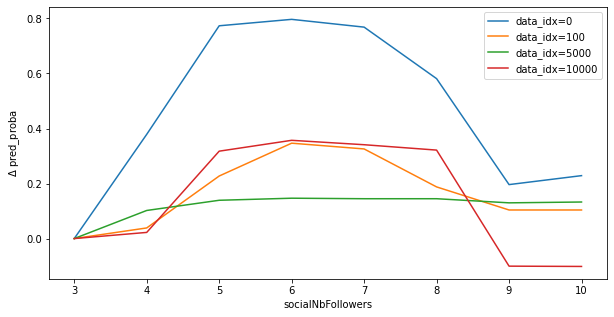

In [ ]:
plt.figure(figsize=(10,5))

from tqdm import tqdm    # tqdm: Python에서 tqdm 라이브러리를 이용한 작업진행률 표시

target_feature = "socialNbFollowers"
# target_feature_range = range(X_val["socialNbFollowers"].min(), X_val["socialNbFollowers"].max() + 1)
target_feature_range = [3, 4, 5, 6, 7, 8, 9, 10]


# for data_index in tqdm(range(len(X_val))):
for data_index in tqdm([0,100, 5000, 10000]):

    plt.plot(
        *get_ice_plot_data(
            X_val, data_index, target_feature, target_feature_range
        ),
        label=f"data_idx={data_index}",
    )


plt.xlabel(target_feature)
plt.ylabel("$\Delta$ pred_proba")
plt.legend()

🥕 <font color ='Orange'> **socialNbFollowers를 많이 늘린다고 구매할 확률이 높아지는건 아니고, default보다 한~두개 더 늘어난 4-5개일 때 구매 확률이 늘어난다. 나를 follow한 user꺼 구경하러 가서 사는건가? 데이터가 너무 많은데, 타겟을 알아보고 추천하면, 살 가능성이 높아지는 것 같다. 판매자들이 자기의 물건을 살만한 사람을 많이 불러모을수록, 구매로 이어질 확률이 높아진다. </br> 판매자가 자기가 가진 물건이 자신이 있으면, 이거 한 번 봐보라고 제안할 것이고, 구매자는 정보의 바다에서 가치없는 물건 대신에 고려해 볼 만한 물건을 보게 되고, 구매하기 괜찮다고 생각해서 구매하는 것. </br>판매자의 안목이 중요하다. "이거 중고로 사도 꽤 괜찮아" 라는 안목!** </font>

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# df_B.query('(socialNbFollowers >3) &(Buy ==1)').sort_values(by='socialNbFollowers', ascending=False).sample(10)
df_B.query('(socialNbFollowers >3)').sort_values(by='socialNbFollowers', ascending=False).sample(10)

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Buy
13037,fr,4,9,0,0,0,0.0,0,2,False,False,True,695,2856,0
13471,en,4,8,68,0,0,0.0,7,2,False,False,True,14,2855,0
11403,en,4,8,0,0,0,0.0,0,2,False,False,True,618,2857,0
12300,de,4,8,0,0,0,0.0,0,2,False,False,True,696,2857,0
1525,en,5,8,15,0,1,0.0,18,2,False,False,True,606,3196,1
11148,en,4,8,0,0,0,0.0,0,2,False,False,True,696,2857,0
2297,en,13,8,0,0,0,0.0,0,1,False,False,True,23,2859,0
10470,en,4,8,0,0,0,0.0,0,2,False,False,True,696,2857,0
5980,es,5,8,0,0,0,0.0,0,2,False,False,True,559,2852,0
11756,es,4,9,0,0,0,0.0,0,2,True,False,False,608,2857,0


🥕 <font color ='Orange'> **Social activity와 관련된 features만으로 확인** </font>

In [ ]:
df_B.columns  

Index(['language', 'socialNbFollowers', 'socialNbFollows',
       'socialProductsLiked', 'productsListed', 'productsSold',
       'productsPassRate', 'productsWished', 'civilityGenderId',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'Buy'],
      dtype='object')

In [ ]:
activity_features=['socialNbFollows','daysSinceLastLogin','productsWished','socialProductsLiked']

In [ ]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split
# Seller_features = Seller_features + [target]

y_train = train[target]
X_train = train[activity_features]
y_val = val[target]
X_val = val[activity_features]
y_test = test[target]
X_test = test[activity_features]

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 4) (63304,) (15826, 4) (15826,) (19783, 4) (19783,)


In [ ]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(), # 가중치를 균일하게 조정
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.8223177050423354


              precision    recall  f1-score   support

           0       0.98      0.84      0.90     18699
           1       0.21      0.74      0.32      1084

    accuracy                           0.83     19783
   macro avg       0.59      0.79      0.61     19783
weighted avg       0.94      0.83      0.87     19783



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


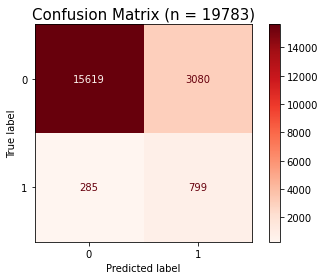

AUC: 0.8547924894458315


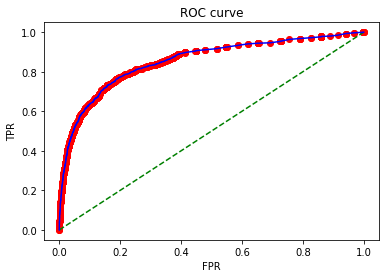

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **Social activity와 관련된 features만 하면, recall 0.77에서 0.74로 감소** </font>

100%|██████████| 4/4 [00:00<00:00, 10.27it/s]


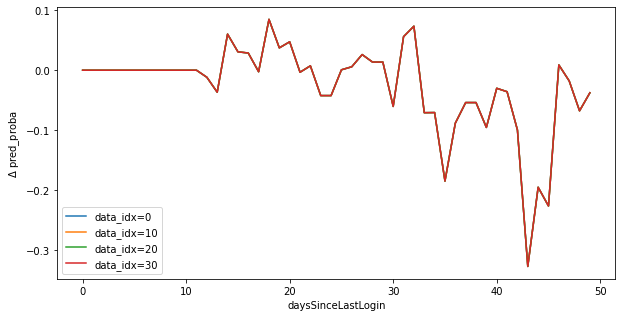

In [ ]:
plt.figure(figsize=(10,5))

from tqdm import tqdm    # tqdm: Python에서 tqdm 라이브러리를 이용한 작업진행률 표시

target_feature = 'daysSinceLastLogin'
# target_feature_range = range(X_val["socialNbFollowers"].min(), X_val["socialNbFollowers"].max() + 1)
target_feature_range = range(50)


# for data_index in tqdm(range(len(X_val))):
for data_index in tqdm([0,10,20,30]):

    plt.plot(
        *get_ice_plot_data(
            X_val, data_index, target_feature, target_feature_range
        ),
        label=f"data_idx={data_index}",
    )


plt.xlabel(target_feature)
plt.ylabel("$\Delta$ pred_proba")
plt.legend()

In [ ]:
X_val.

,socialNbFollows,daysSinceLastLogin,productsWished,socialProductsLiked
23806,8,482,0,0
74183,8,215,0,0
34982,8,39,3,15
76422,8,694,0,0
84869,8,693,0,0
20101,8,706,0,0
49765,8,701,0,0
41092,8,651,0,0
59183,8,178,0,0
9344,8,701,0,0


### Evaluation
- Test set으로 검증하기
- 검증 기준에 대한 이유 필요

### Interpretation

[checklist](https://urclass.codestates.com/content/b89961aa-fb0a-4698-ace1-4195281f06e5?playlist=2582)

파일 이름: `AI_15_홍지혜_section2_project.mp4`
- github에는 public으로 업로드하기
- Repository에 Readme로 정리